<a href="https://colab.research.google.com/github/imtufail/Machine-Learning-Contents/blob/main/Feature%20Scaling%20/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
custdf = pd.read_csv('Customer.xls')
snwdf = pd.read_csv('Social_Network_Ads.xls')
trndf=pd.read_csv('train.xls')
evsdf= pd.read_csv('EVSE-B-PowerCombined.csv')

In [3]:
custdf.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [6]:
snwdf .head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
trndf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
evsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115298 entries, 0 to 115297
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           115298 non-null  object 
 1   shunt_voltage  115298 non-null  int64  
 2   bus_voltage_V  115298 non-null  float64
 3   current_mA     115298 non-null  int64  
 4   power_mW       115298 non-null  int64  
 5   State          115298 non-null  object 
 6   Attack         115298 non-null  object 
 7   Attack-Group   115298 non-null  object 
 8   Label          115298 non-null  object 
 9   interface      115298 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 8.8+ MB


In [31]:
evsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115298 entries, 0 to 115297
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           115298 non-null  object 
 1   shunt_voltage  115298 non-null  int64  
 2   bus_voltage_V  115298 non-null  float64
 3   current_mA     115298 non-null  int64  
 4   power_mW       115298 non-null  int64  
 5   State          115298 non-null  object 
 6   Attack         115298 non-null  object 
 7   Attack-Group   115298 non-null  object 
 8   Label          115298 non-null  object 
 9   interface      115298 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 8.8+ MB


# Train Test Split.
## it is recommended to do train test split before
either you have to do Standardaisation or Normalisation

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(evsdf.drop(['Label'],axis =1),
                                               evsdf['Label'],
                                               test_size=0.3,
                                               random_state=0)
x_train.shape, x_test.shape

((80708, 9), (34590, 9))

In [51]:
# x_train = x_train.drop(columns=['time'], errors='ignore')
# x_test = x_test.drop(columns=['time'], errors='ignore')
evsdf['time'] = pd.to_datetime(evsdf['time'], errors='coerce')
evsdf['year'] = evsdf['time'].dt.year
evsdf['month'] = evsdf['time'].dt.month
evsdf['day'] = evsdf['time'].dt.day
evsdf['hour'] = evsdf['time'].dt.hour

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface,year,month,day,hour
0,2023-12-25 22:35:00,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
1,2023-12-25 22:35:00,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
2,2023-12-25 22:35:00,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
3,2023-12-25 22:35:00,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
4,2023-12-25 22:35:00,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22


In [54]:
evsdf = evsdf.drop(columns=['time'])

In [55]:
evsdf.head()

,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface,year,month,day,hour
0,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
1,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
2,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
3,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
4,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22


In [41]:
x_train = x_train.select_dtypes(include=['number'])
x_test = x_test.select_dtypes(include=['number'])

#Satandard Saclar

In [42]:
from sklearn.preprocessing import StandardScaler as standardscaler
scaler = standardscaler()
# fit the scaler to train the set, it will learn the parameters
scaler.fit(x_train)

#transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Standard Scalar

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Fit the scalar to the training set, it will learn the parameters
sc.fit(x_train)

# Transform train and test sets
X_train_scaled = sc.transform(x_train)
X_test_scaled = sc.transform(x_test)
# Fit the scalar to the training set, it will learn the parameters
sc.fit(x_train)

StandardScaler()

In [46]:
sc.mean_

array([ 619.82714229,    5.18820573,  619.64496704, 3212.18565694])

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [57]:
np.round(x_train.describe(), 2)

,shunt_voltage,bus_voltage_V,current_mA,power_mW
count,80708.00,80708.00,80708.00,80708.00
mean,619.83,5.19,619.64,3212.19
std,197.09,0.01,197.25,1010.82
min,417.00,5.15,417.00,2160.00
25%,467.00,5.18,467.00,2420.00
50%,510.00,5.20,510.00,2660.00
75%,746.00,5.20,746.00,3860.00
max,1214.00,5.20,1185.00,6260.00


In [58]:
np.round(X_train_scaled.describe(), 2)

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,interface
count,0.0,80708.00,80708.00,80708.00,80708.00,0.0,0.0,0.0,0.0
mean,NaN,0.00,-0.00,0.00,0.00,NaN,NaN,NaN,NaN
std,NaN,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
min,NaN,-1.03,-2.71,-1.03,-1.04,NaN,NaN,NaN,NaN
25%,NaN,-0.78,-0.50,-0.77,-0.78,NaN,NaN,NaN,NaN
50%,NaN,-0.56,0.61,-0.56,-0.55,NaN,NaN,NaN,NaN
75%,NaN,0.64,0.61,0.64,0.64,NaN,NaN,NaN,NaN
max,NaN,3.01,1.16,2.87,3.02,NaN,NaN,NaN,NaN


In [63]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80708 entries, 0 to 80707
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           0 non-null      float64
 1   shunt_voltage  80708 non-null  float64
 2   bus_voltage_V  80708 non-null  float64
 3   current_mA     80708 non-null  float64
 4   power_mW       80708 non-null  float64
 5   State          0 non-null      float64
 6   Attack         0 non-null      float64
 7   Attack-Group   0 non-null      float64
 8   interface      0 non-null      float64
dtypes: float64(9)
memory usage: 5.5 MB


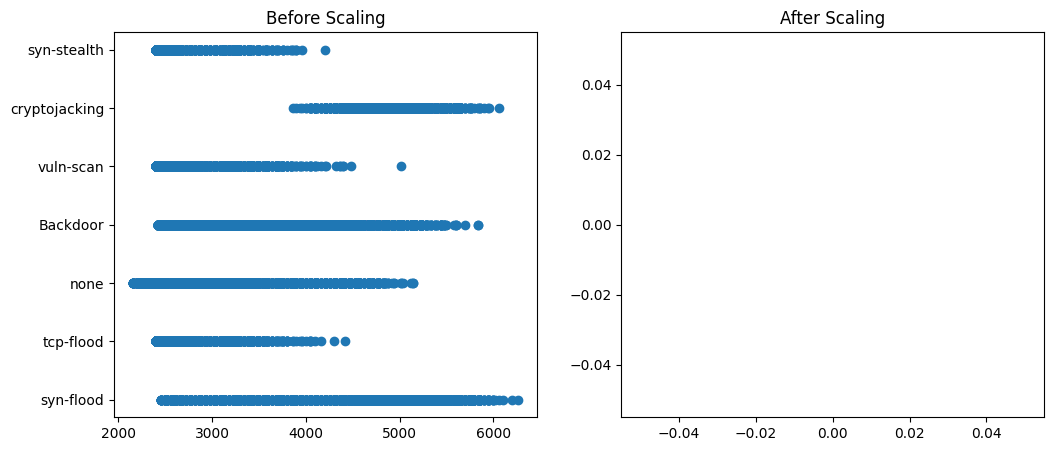

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['power_mW'], x_train['Attack'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['power_mW'], X_train_scaled['Attack'],color='red')
ax2.set_title("After Scaling")
plt.show()